In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from scipy.stats import spearmanr, pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
# Function to load data
def load_data(file_path: str) -> pd.DataFrame:
    """Loads an Excel file into a Pandas DataFrame."""
    try:
        return pd.read_excel(file_path)
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

In [3]:
# Function to visualize histogram
def plot_histogram(data: pd.Series, title: str, xlabel: str, color: str):
    """Plots a histogram for the given data column."""
    sns.histplot(data, color=color, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.show()

In [4]:
# Function to perform regression analysis
def run_regression(df: pd.DataFrame, target: str, predictors: list):
    """Runs an OLS regression and returns the summary."""
    X = pd.get_dummies(df[predictors], drop_first=True)
    X = X.apply(pd.to_numeric, errors='coerce').fillna(X.mean())
    y = pd.to_numeric(df[target], errors='coerce')
    model = sm.OLS(y, sm.add_constant(X.astype(float))).fit()
    print(model.summary())
    return model


In [5]:
# Load the data
data_path = "Rural_66.xlsx"
data = load_data(data_path)

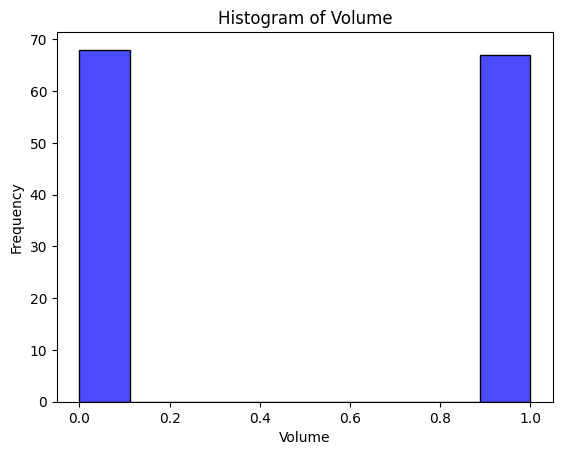

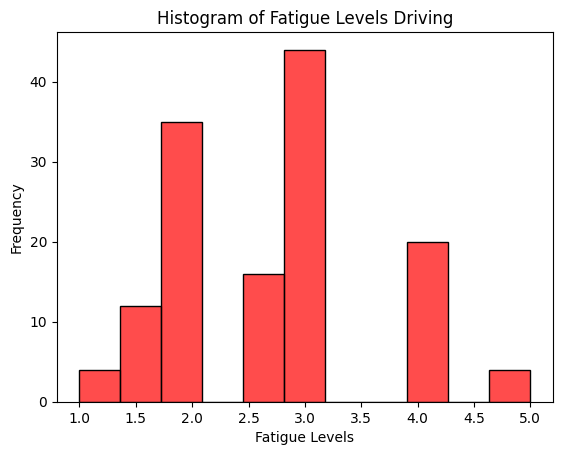

                            OLS Regression Results                            
Dep. Variable:       Avg_ReactionTime   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     38.51
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           3.12e-21
Time:                        14:29:54   Log-Likelihood:                -32.793
No. Observations:                 135   AIC:                             75.59
Df Residuals:                     130   BIC:                             90.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [6]:
if data is not None:
    # Visualizations
    plot_histogram(data['Volume'], "Histogram of Volume", "Volume", "blue")
    plot_histogram(data['fatigue_levels_driving'], "Histogram of Fatigue Levels Driving", "Fatigue Levels", "red")
    
    # Run regression
    model = run_regression(data, 'Avg_ReactionTime', ['fatigue', 'Volume', 'hrs_awake', 'fatigue_levels_driving'])
